In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/MachineLearning/HW2

/content/drive/MyDrive/Colab Notebooks/MachineLearning/HW2


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"narges8k","key":"91aea05d8f9c2ca6c8ddbfd6914bdfb6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 2.16MB/s]


In [ ]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

In [3]:
plt.style.use('seaborn')

In [17]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
selected_cols = ['sex', 'smoker', 'region']
ord_enc = OrdinalEncoder ()
df[selected_cols]=ord_enc.fit_transform(df[selected_cols])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [20]:
df.values

array([[0.02173913, 0.        , 0.3212268 , ..., 1.        , 1.        ,
        0.25161076],
       [0.        , 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00963595],
       [0.2173913 , 1.        , 0.45843422, ..., 0.        , 0.66666667,
        0.05311516],
       ...,
       [0.        , 0.        , 0.56201238, ..., 0.        , 0.66666667,
        0.00810808],
       [0.06521739, 0.        , 0.26472962, ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 0.        , 0.35270379, ..., 1.        , 0.33333333,
        0.44724873]])

In [7]:
Y = df.charges
X = df.drop('charges', axis = 1)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20)

In [ ]:
print("\nx_train:\n")
print(x_train.head())
print(x_train.shape)

print("\nx_test:\n")
print(x_test.head())
print(x_test.shape)


x_train:

           age  sex       bmi  children  smoker    region
376   0.456522  0.0  0.240248       0.6     1.0  0.000000
1028  0.782609  1.0  0.420769       0.0     0.0  1.000000
903   0.673913  1.0  0.562012       0.0     0.0  0.666667
869   0.152174  0.0  0.224374       0.6     0.0  1.000000
914   0.326087  1.0  0.232580       0.4     0.0  0.333333
(1070, 6)

x_test:

           age  sex       bmi  children  smoker    region
1214  0.195652  0.0  0.411488       0.2     0.0  0.333333
1048  0.152174  0.0  0.176352       0.2     0.0  0.333333
428   0.065217  0.0  0.023002       0.2     0.0  0.000000
710   0.000000  1.0  0.517622       0.2     0.0  0.666667
348   0.391304  0.0  0.375572       0.2     0.0  0.666667
(268, 6)


## Linear Regression

In [45]:
lm = LinearRegression ()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
lm.score(x_test, y_test)

0.7296646657433239

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

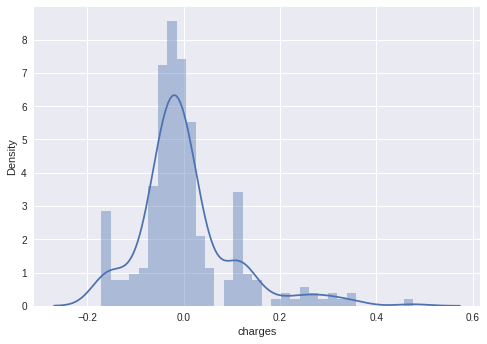

In [ ]:
predictions = lm.predict(x_test)
sns.distplot((y_test - predictions))
plt.savefig('linearR.png')
files.download('linearR.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

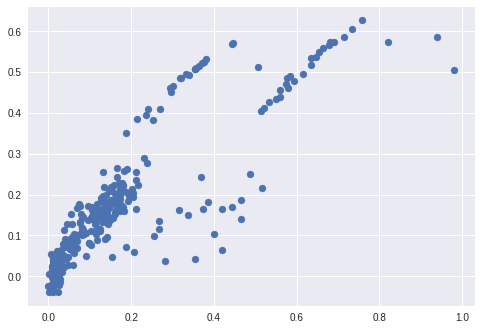

In [ ]:
plt.scatter(y_test, predictions)
plt.savefig('linearR_scatter.png')
files.download('linearR_scatter.png')

## SVR with Linear Kernel

In [10]:
svr_lin = SVR(kernel = 'linear', degree = 3, coef0 = 1)

In [11]:
svr_lin.fit(x_train, y_train)

SVR(coef0=1, kernel='linear')

In [ ]:
svr_lin.score(x_test, y_test)

0.7110971727822234

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

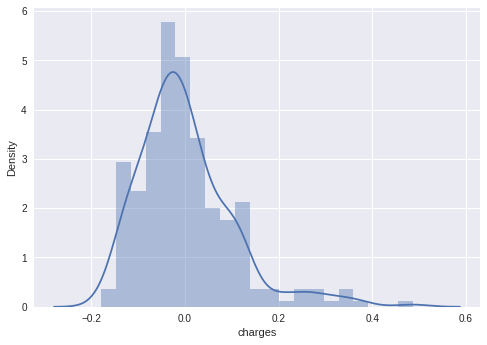

In [ ]:
predictions = svr_lin.predict(x_test)
sns.distplot((y_test - predictions))
plt.savefig('svr_lin.png')
files.download('svr_lin.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

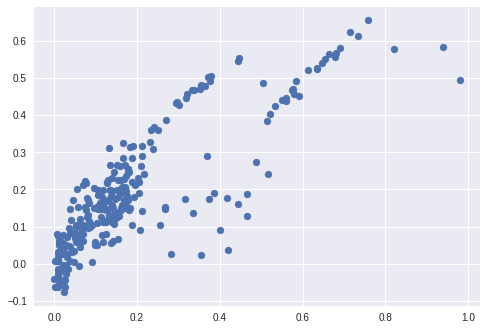

In [ ]:
plt.scatter(y_test, predictions)
plt.savefig('svr_lin_scatter.png')
files.download('svr_lin_scatter.png')

## SVR with Poly Kernel

In [12]:
svr_poly = SVR(kernel = 'poly', degree = 3, coef0 = 1)

In [13]:
svr_poly.fit(x_train, y_train)

SVR(coef0=1, kernel='poly')

In [14]:
svr_poly.score(x_test, y_test)

0.6842361729120802

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

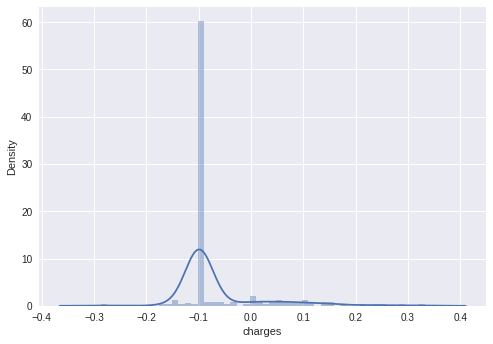

In [16]:
predictions = svr_poly.predict(x_test)
sns.distplot((y_test - predictions))
plt.savefig('svr_poly.png')
files.download('svr_poly.png')

### Classification of charges

In [29]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
for i,c in enumerate(df['charges']):
  if c<=10000:
    df.replace(c, '<=10k', inplace = True)
  if c>10000 and c<=20000: 
    df.replace(c, '>10k & <=20k', inplace = True)
  if c>20000 and c<=30000:
    df.replace(c, '>20k & <=30k', inplace = True)
  if c>30000 and c<=40000:
    df.replace(c, '>30k & <=40k', inplace = True)
  if c>40000:
    df.replace(c, '>40k', inplace = True)

In [79]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
selected_cols = ['sex', 'smoker', 'region', 'charges']
ord_enc = OrdinalEncoder ()
df[selected_cols]=ord_enc.fit_transform(df[selected_cols])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,1.0
1,18,1.0,33.770,1,0.0,2.0,0.0
2,28,1.0,33.000,3,0.0,2.0,0.0
3,33,1.0,22.705,0,0.0,1.0,2.0
4,32,1.0,28.880,0,0.0,1.0,0.0


In [32]:
scaler = MinMaxScaler()
X_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
df[X_cols] = scaler.fit_transform(df[X_cols])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,2.0
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.0


In [82]:
Y = df.charges
X = df.drop('charges', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.30)

## KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [86]:
knn.fit (x_train, y_train)

KNeighborsClassifier()

In [87]:
pred = knn.predict (x_test)

In [88]:
print(confusion_matrix(y_test,pred))

[[212   9   0   0   0]
 [ 26  76   0   1   0]
 [  9  12  12   1   1]
 [  0   8   0   8   3]
 [  0   1   5   2  16]]


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       221
         1.0       0.72      0.74      0.73       103
         2.0       0.71      0.34      0.46        35
         3.0       0.67      0.42      0.52        19
         4.0       0.80      0.67      0.73        24

    accuracy                           0.81       402
   macro avg       0.75      0.63      0.67       402
weighted avg       0.80      0.81      0.79       402



####ُ SVR with poly kernel

In [ ]:
svr_poly = SVR(kernel = 'poly', degree = 3, coef0 = 1)
svr_poly.fit(x_train, y_train)

SVR(coef0=1, kernel='poly')

In [ ]:
predictions = svr_poly.predict(x_test)

In [ ]:
svr_poly.score(x_test, y_test)

0.7830881395244443

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

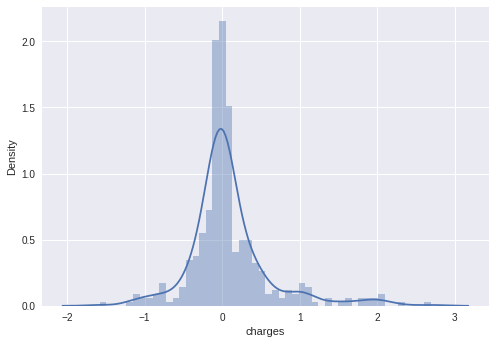

In [ ]:
sns.distplot((y_test-predictions))
plt.savefig('svr_poly.png')
files.download('svr_poly.png')

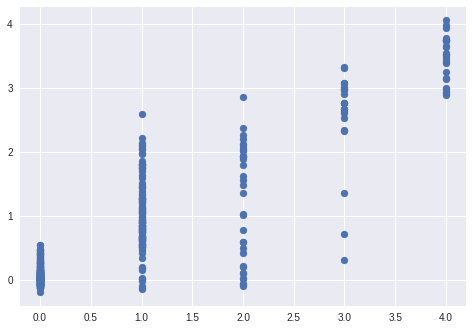

In [ ]:
plt.scatter(y_test, predictions)

#### SVC

In [24]:
svc_model = SVC()

In [25]:
svc_model.fit(x_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = svc_model.predict (x_test)

In [ ]:
print (confusion_matrix(y_test, predictions))

[[205   3   0   0   0]
 [ 18  87   3   6   0]
 [ 10   8  15   1   0]
 [  0   3   5  14   0]
 [  0   0   0   3  21]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       208
         1.0       0.86      0.76      0.81       114
         2.0       0.65      0.44      0.53        34
         3.0       0.58      0.64      0.61        22
         4.0       1.00      0.88      0.93        24

    accuracy                           0.85       402
   macro avg       0.80      0.74      0.76       402
weighted avg       0.85      0.85      0.84       402



#### PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA (n_components=2)

In [28]:
xData = df.drop('charges', axis=1)

In [29]:
pca.fit (xData)

PCA(n_components=2)

In [30]:
xData.shape

(1338, 6)

In [31]:
x_pca = pca.transform (xData)

In [32]:
x_pca.shape

(1338, 2)

In [33]:
pca.components_.shape

(2, 6)

Text(0, 0.5, 'Second Principal Component')

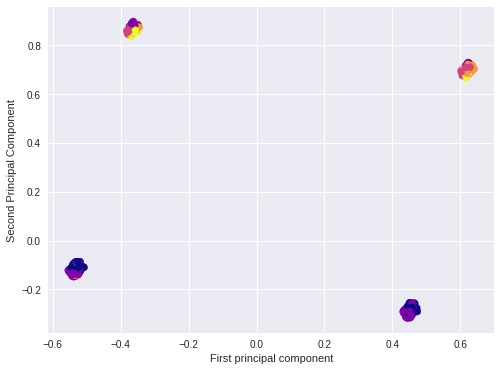

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df['charges'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [35]:
df_comp = pd.DataFrame(pca.components_,columns=X_cols)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

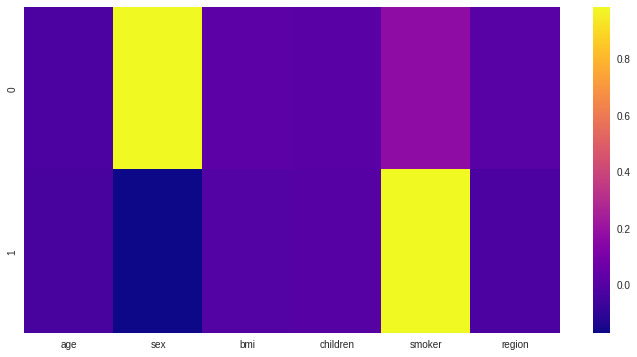

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)
plt.savefig('comp_heatmap.png')
files.download('comp_heatmap.png')

## Linear Regression with Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(2)
new_X = poly.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(new_X, Y, test_size = 0.3)

In [11]:
poly.fit_transform(X).shape

(1338, 28)

In [12]:
lm = LinearRegression ()
lm.fit(x_train, y_train)

LinearRegression()

In [13]:
lm.score(x_test, y_test)

0.8199104895969911

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

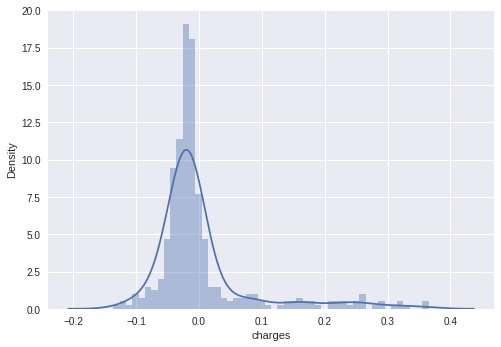

In [14]:
predictions = lm.predict(x_test)
sns.distplot((y_test - predictions))
plt.savefig('linearR_withPoly.png')
files.download('linearR_withPoly.png')

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rand_forest_regressor = RandomForestRegressor(n_estimators=500)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20)

In [72]:
rand_forest_regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [73]:
rand_forest_regressor.score(x_train,y_train)

0.978244294666698

In [74]:
rand_forest_regressor.score(x_test,y_test)

0.8262341327080196

In [75]:
rf_predictions = rand_forest_regressor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

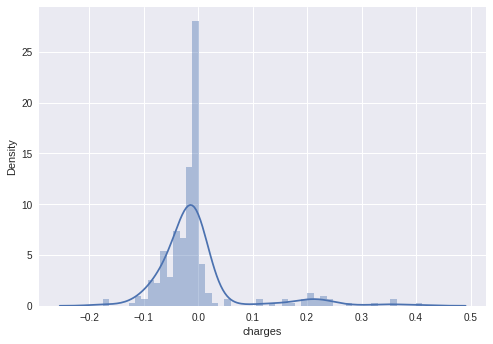

In [76]:
sns.distplot((y_test - rf_predictions))
plt.savefig('rand_forest_reg.png')
files.download('rand_forest_reg.png')

## K Means Clustering

In [21]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.values)
kmeans.predict(df.values)

array([0, 2, 2, ..., 2, 2, 0], dtype=int32)

In [34]:
kmeans.cluster_centers_

array([[6.56156297e-01, 4.65517241e-01, 3.72928611e-01, 2.19827586e-01,
        2.62931034e-01, 4.72701149e-01, 1.23922414e+00],
       [4.86446592e-01, 6.35802469e-01, 5.08082650e-01, 2.33333333e-01,
        9.38271605e-01, 5.39094650e-01, 3.48765432e+00],
       [3.28071568e-01, 5.01404494e-01, 3.84728306e-01, 2.15168539e-01,
        1.30451205e-15, 5.18726592e-01, 2.88657986e-15]])

In [35]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score

In [36]:
target = df.charges

In [40]:
completeness_score (labels_true=target, labels_pred=kmeans.labels_)

0.9999999999999996

In [38]:
homogeneity_score (labels_true=target, labels_pred=kmeans.labels_)

0.7772742676688331

In [41]:
!ls

comp_heatmap.png  linearR.png		rf.png		     Untitled0.ipynb
insurance.csv	  linearR_scatter.png	svr_lin.png
insurance.zip	  linearR_withPoly.png	svr_lin_scatter.png
kaggle.json	  rand_forest_reg.png	svr_poly.png
